# Basic Logistic Regression Classification Example
The dataset is for sales forecasting. The model will predict a sales opportunity.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
DATA = './data/'

In [16]:
df = pd.read_csv(f'{DATA}UST22.csv')
df.head(20)

,Project ID,Opportunity Owner,Account Name,Stage,Amount,Expected Revenue,Probability,Service Category,Service Line,Stage Number,New Business,Account Type,Billing Type,MSA Signed,Unsolicited Proposal,Deliverable Type
0,1,Amandeep Sidhu,"Dana Companies, Llc",Signed Contract,7680.0,7680.0,1,NaN,Enterprise Solutions,8,0,US-Central BU,Time and Expense,0,No,Scope of Work / Project
1,2,Amandeep Sidhu,"Dana Companies, Llc",Verbal Agreement,6400.0,5760.0,1,NaN,Enterprise Solutions,7,0,US-Central BU,Time and Expense,0,No,Scope of Work / Project
2,3,Amandeep Sidhu,"Dana Companies, Llc",Verbal Agreement,3600.0,3240.0,1,NaN,Enterprise Solutions,7,0,US-Central BU,Time and Expense,0,No,Scope of Work / Project
3,4,Amandeep Sidhu,"Dana Companies, Llc",Verbal Agreement,3600.0,3240.0,1,NaN,Enterprise Solutions,7,0,US-Central BU,Time and Expense,0,No,Scope of Work / Project
4,5,Anand Nair,"Wellpoint, Inc",Signed Contract,50224.0,50224.0,1,Mainframe Systems,Technology Build Services,8,0,WellPoint BU,Flat Fee Monthly,0,No,Staff Augmentation
5,6,Anand Nair,"Wellpoint, Inc",Signed Contract,205842.0,205842.0,1,NaN,Technology Build Services,8,0,WellPoint BU,Flat Fee Monthly,0,No,Staff Augmentation
6,7,Anand Nair,"Wellpoint, Inc",Signed Contract,192066.0,192066.0,1,NaN,Technology Build Services,8,0,WellPoint BU,Flat Fee Monthly,0,No,Staff Augmentation
7,8,Arun Satyan,OfficeMax Incorporated,Proposal On-desk Stage,50000.0,30000.0,1,Mainframe Systems,Technology Build Services,5,0,US-Central BU,Time and Expense,0,No,Staff Augmentation
8,9,Brian Runyan,Sempra Energy,Opportunity Identification Stage,10000000.0,3000000.0,0,NaN,Application Managed Services,3,0,US-West BU,Flat Fee Monthly,0,Yes,Managed Services / SLA Based
9,10,Chris Bryson,Starbucks,Proposal Preparation Stage,148200.0,74100.0,1,NaN,Technology Build Services,4,0,US-West BU,Fixed Bid,0,No,Scope of Work / Project


In [17]:
df.columns

Index(['Project ID', 'Opportunity Owner', 'Account Name', 'Stage', ' Amount ',
       'Expected Revenue', 'Probability', 'Service Category', 'Service Line',
       'Stage Number', 'New Business', 'Account Type', 'Billing Type',
       'MSA Signed', 'Unsolicited Proposal', 'Deliverable Type'],
      dtype='object')

In [29]:
print(f'mean amount: ${round(df[" Amount "].mean(), 2)}')
print(f'median amount: ${round(df[" Amount "].median(), 2)}')
df[[' Amount ', 'Expected Revenue']].describe()

mean amount: $292560.71
median amount: $42525.0


,Amount,Expected Revenue
count,6.891000e+03,6.891000e+03
mean,2.925607e+05,1.115754e+05
std,1.916039e+06,8.090385e+05
min,-9.009600e+05,-9.009600e+05
25%,6.306300e+03,0.000000e+00
50%,4.252500e+04,7.500000e+03
75%,1.350100e+05,6.162568e+04
max,9.100000e+07,3.960000e+07


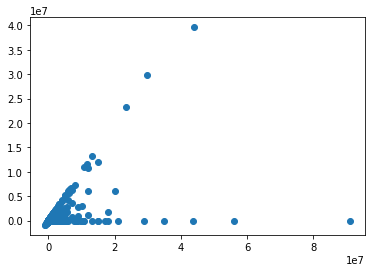

In [39]:
plt.scatter(df[' Amount '], df['Expected Revenue'])

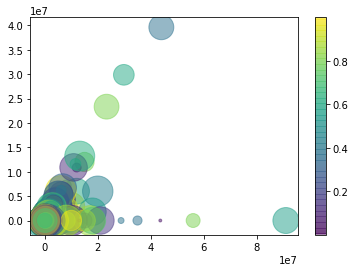

In [37]:
rng = np.random.RandomState(0)
x = df[' Amount ']
y = df['Expected Revenue']
colors = rng.rand(df.shape[0])
sizes = 1000 * rng.rand(df.shape[0])
plt.scatter(x, y, c=colors, s=sizes, alpha=.5)
plt.colorbar() 

,Total,Percent
Service Category,673,9.766362
Unsolicited Proposal,9,0.130605
Account Type,6,0.087070
Deliverable Type,5,0.072558
Billing Type,2,0.029023


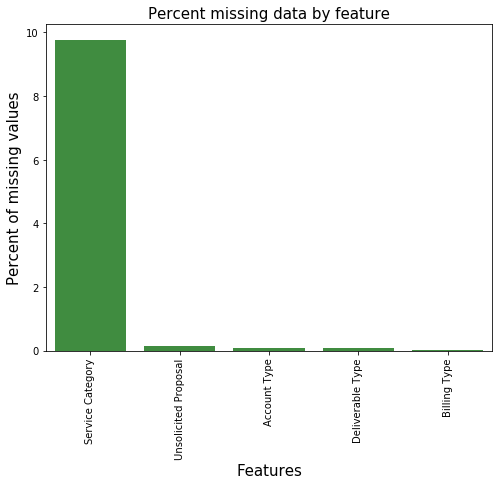

In [41]:
def show_missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending = False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]
    
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation='90')
    fig = sns.barplot(ms.index, ms["Percent"], color="green", alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15) 
    return ms

show_missing(df) 

In [53]:
df = pd.read_csv(f'{DATA}UST22.csv') # ahhh lolllll
drop_column = ['Service Category']
df.drop(drop_column, axis=1, inplace = True) 

df['Billing Type'].fillna(df['Billing Type'].mode()[0], inplace = True)
df['Deliverable Type'].fillna(df['Deliverable Type'].mode()[0], inplace = True)
df['Account Type'].fillna(df['Account Type'].mode()[0], inplace = True)
df['Unsolicited Proposal'].fillna(df['Unsolicited Proposal'].mode()[0], inplace = True) 

df.shape
# show_missing(df)

(6891, 15)

In [54]:
df.shape
df.dtypes

Project ID                int64
Opportunity Owner        object
Account Name             object
Stage                    object
 Amount                 float64
Expected Revenue        float64
Probability               int64
Service Line             object
Stage Number              int64
New Business              int64
Account Type             object
Billing Type             object
MSA Signed                int64
Unsolicited Proposal     object
Deliverable Type         object
dtype: object

In [65]:
corr = df.corr()['Probability'].sort_values()
print(corr.head(15), '\n')
corr.tail(15)

New Business       -0.088450
Project ID         -0.064737
 Amount            -0.054859
MSA Signed          0.034142
Expected Revenue    0.102259
Stage Number        0.552487
Probability         1.000000
Name: Probability, dtype: float64 



New Business       -0.088450
Project ID         -0.064737
 Amount            -0.054859
MSA Signed          0.034142
Expected Revenue    0.102259
Stage Number        0.552487
Probability         1.000000
Name: Probability, dtype: float64

In [69]:
all_data = df
train_df = pd.get_dummies(
    df,
    columns = [
        "Opportunity Owner",
        "Account Name",
        "Stage",
        "Service Line",
        "Stage Number",
        "Account Type",
        "Billing Type",
        "Unsolicited Proposal",
        "Deliverable Type",
    ],
    prefix=[
        "Owner",
        "Account",
        "Stg",
        "SvcLn",
        "StgNum",
        "Acctype",
        "Billngtype",
        "UnSolProp",
        "DelType",
    ],
) 

In [111]:
from sklearn.model_selection import (
    train_test_split,
    KFold, cross_val_score,
    cross_val_predict,
    GridSearchCV,
)

df_no_labels = train_df.drop('Probability', axis=1) # The data without the target feature
label = df['Probability'] # The target feature

X_train, X_test, y_train, y_test = train_test_split(
    df_no_labels,
    label,
    test_size=0.3,
    random_state=42,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4823, 498), (2068, 498), (4823,), (2068,))

# Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred = logreg.predict(X_test)

accuracy: %96.325
[[ 869    2]
 [  74 1123]]


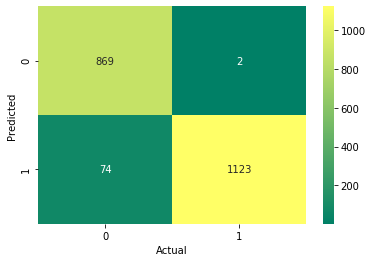

In [105]:
from sklearn import metrics
def fmt(s):
    return '%' + str(round(s * 100, 4))
print(f'accuracy: {fmt(logreg.score(X_test, y_test))}')

heatmap = sns.heatmap(
    metrics.confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='summer',
)

heatmap.set_xlabel('Actual')
heatmap.set_ylabel('Predicted')

print(metrics.confusion_matrix(y_test, y_pred))

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700, min_samples_split=10,min_samples_leaf=1, max_features='auto',oob_score=True, random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
y_pred_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(metrics.accuracy_score(y_pred_rm,y_test)*100,2))
# K fold Cross Validation
kfold = KFold(n_splits=10, random_state=22)
# k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,df_no_labels,label,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,df_no_labels, label,cv=10)
kfold = KFold(n_splits=5, random_state=22)
# k=5, split the data into 5 equal parts result_rm1=cross_ 
kfold = KFold(n_splits=5, random_state=22)
# k=5, split the data into 5 equal parts
result_rm1=cross_val_score(model,df_no_labels,label,cv=5,scoring='accuracy')
print('The cross validated score (5)for Random Forest Classifier is:',round(result_rm1.mean()*100,2))
#sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
#plt.title('Confusion_matrix', y=1.05, size=15) 

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 99.56
The cross validated score for Random Forest Classifier is: 99.01
The cross validated score (5)for Random Forest Classifier is: 98.16


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       874
           1       0.99      1.00      1.00      1194

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068



Text(91.68, 0.5, 'predicted label')

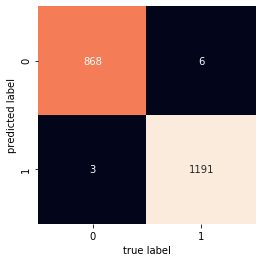

In [113]:
print(metrics.classification_report(y_pred_rm, y_test)) 
mat = metrics.confusion_matrix(y_test, y_pred_rm)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False,
)
plt.xlabel('true label')
plt.ylabel('predicted label') 